# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests
url = 'https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31'
url_get =  requests.get(url)

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup

In [4]:
soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
# dengan menggunakan find_all, kita akan mendapatkan list dari setiap kotak judul
# setiap kotak judul tersebut memuat seluruh rincian data yang kita butuhkan dari setiap judul
# kotak judul didapatkan dengan menentukan/inspect elemen berupa 'div' dan class berupa 'lister-item-content'
table = soup.find_all('div',{'class':'lister-item-content'})
table

[<div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt7144666/">The Black Phone</a>
 <span class="lister-item-year text-muted unbold">(2021)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">17+</span>
 <span class="ghost">|</span>
 <span class="runtime">103 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Horror, Thriller            </span>
 </p>
 <div class="ratings-bar">
 <div class="inline-block ratings-imdb-rating" data-value="7.3" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>7.3</strong>
 </div>
 <div class="inline-block ratings-user-rating">
 <span class="userRatingValue" data-tconst="tt7144666" id="urv_tt7144666">
 <span class="global-sprite rating-star no-rating"></span>
 <span class="rate" data-no-rating="Rate this" data-value="0" name="ur">Rate this</span>
 </span>
 <div class="starBarWidget" id="sb_tt7144666">
 <di

Finding row length.

In [6]:
# code dibawah ini menginformasikan ada berapa kotak judul yang kita tarik sebelumnya menggunakan find_all
# hasilnya 50, sesuai dengan jumlah judul yang ditampilkan url IMDB 
row_length = len(table)
row_length

50

Do the scrapping process here (please change this markdown with your explanation)
- Pada code dibawah ini akan dilakukan scraping dari 50 kotak judul yang bernama 'table'
- Scraping akan disimpan dalam bentuk tupple bernama 'data'
- Karena data yang kita butuhkan tersebar di 50 kotak judul, untuk mengambil data dilakukan secara looping
- Dari kotak judul, kita akan mengambil judul film yang diinspect berada pada elemen 'a'
- Dari elemen a, kita akan menarik data berbentuk text, lalu membuang data html lain yg berbentuk string dengan fungsi strip
- Lalu kita mengambil rating, yang terletak pada elemen 'strong'
- Lalu mengambil data metascore yang terletak pada elemen 'span' dan class 'metascore favorable'
- Pada data metascore jumlah baris tidak sampai 50, menandakan adanya missing value
- Untuk itu kita treat dengan menambahkan code dibawah dimana apabila data tidak ada yang ditarik akan menjadi nila 'N/A'
- Lalu selanjutnya kita mengambil data votes pada elemen 'span' serta name 'nv'
- setelah penarikan dilakukan tiap data tersebut diprint dan diappend kedalam 'data'

In [7]:
data = []
for ta in table:
    judul = ta.find('a').text.strip()
    rating = ta.find('strong').text.strip()
    metascore1 = ta.find('span',{'class':'metascore favorable'})
    metascore = metascore1.get_text(strip=True) if metascore1 else 'N/A'
    votes = ta.find('span',{'name':'nv'}).text.strip()
    print(judul)
    print(rating)
    print(metascore)
    print(votes)
    data.append([judul,rating,metascore,votes])

The Black Phone
7.3
65
22,352
Only Murders in the Building
8.1
N/A
72,966
Sing 2
7.4
N/A
55,041
Spider-Man: No Way Home
8.3
71
671,152
1883
8.8
N/A
55,865
No Time to Die
7.3
68
372,116
Superman & Lois
7.8
N/A
30,492
Last Night in Soho
7.1
65
112,206
Hacks
8.2
N/A
25,046
Dune: Part One
8.0
74
587,224
Ghostbusters: Afterlife
7.1
N/A
161,485
Mad God
6.8
80
4,499
The Book of Boba Fett
7.3
N/A
133,296
You Don't Know Me
6.9
N/A
3,818
WandaVision
7.9
N/A
300,718
Pleasure
6.3
75
12,072
Old
5.8
N/A
109,057
Eternals
6.3
N/A
317,685
Invincible
8.7
N/A
120,771
House of Gucci
6.6
N/A
110,182
Resident Evil: Welcome to Raccoon City
5.2
N/A
46,770
Licorice Pizza
7.3
90
88,694
Ojing-eo geim
8.0
N/A
424,610
Verdens verste menneske
7.9
90
50,297
Free Guy
7.1
62
348,361
Encanto
7.2
75
204,999
Yellowjackets
7.9
N/A
40,017
Arcane: League of Legends
9.0
N/A
184,167
Loki
8.2
N/A
290,699
The Card Counter
6.3
77
29,044
The Matrix Resurrections
5.7
63
233,886
Operation Mincemeat
6.6
65
17,279
Shang-Chi and the L

In [8]:
print(data)

[['The Black Phone', '7.3', '65', '22,352'], ['Only Murders in the Building', '8.1', 'N/A', '72,966'], ['Sing 2', '7.4', 'N/A', '55,041'], ['Spider-Man: No Way Home', '8.3', '71', '671,152'], ['1883', '8.8', 'N/A', '55,865'], ['No Time to Die', '7.3', '68', '372,116'], ['Superman & Lois', '7.8', 'N/A', '30,492'], ['Last Night in Soho', '7.1', '65', '112,206'], ['Hacks', '8.2', 'N/A', '25,046'], ['Dune: Part One', '8.0', '74', '587,224'], ['Ghostbusters: Afterlife', '7.1', 'N/A', '161,485'], ['Mad God', '6.8', '80', '4,499'], ['The Book of Boba Fett', '7.3', 'N/A', '133,296'], ["You Don't Know Me", '6.9', 'N/A', '3,818'], ['WandaVision', '7.9', 'N/A', '300,718'], ['Pleasure', '6.3', '75', '12,072'], ['Old', '5.8', 'N/A', '109,057'], ['Eternals', '6.3', 'N/A', '317,685'], ['Invincible', '8.7', 'N/A', '120,771'], ['House of Gucci', '6.6', 'N/A', '110,182'], ['Resident Evil: Welcome to Raccoon City', '5.2', 'N/A', '46,770'], ['Licorice Pizza', '7.3', '90', '88,694'], ['Ojing-eo geim', '8.0

In [ ]:
# # # diatas kita telah melakukan scraping untuk 1 page, pada code dibawah kita akan melakukan pada multiple page
# # # jumlah film dari multiple page yang akan ditarik adalah 10.000 judul terpopuler selama 2021
# # # sebagai informasi, total judul film selama 2021 adalah 949,442 judul
# # # namun karena halaman web untuk data 10.000 keatas menggunakan huruf random yang tidak bisa dirumuskan, 
# # # maka scraping hanya sampai 10,000 judul
# # # scraping multiple page dilakukan dengan menentukan alamar url di page selanjutnya menggunakan looping

# start = 51
# # # data2 = []
# while start !=101:
#       url2 = f"https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31"+'&start='+str(start)+'&ref_=adv_nxt'
# # url_get2 = requests.get(url2)
# # # soup2 = BeautifulSoup(url_get2.content,"html.parser")
# # # table2 = soup2.find_all('div',{'class':'lister-item-content'})

# # # for ta in table2:
# # #     judul2 = ta.find('a').text.strip()
# # #     rating2 = ta.find('strong').text.strip()
# # #     metascore3 = ta.find('span',{'class':'metascore favorable'})
# # #     metascore2 = metascore3.get_text(strip=True) if metascore3 else 'N/A'
# # #     votes2 = ta.find('span',{'name':'nv'}).text.strip()
# # #     print(judul2)
# # #     print(rating2)
# # #     print(metascore2)
# # #     print(votes2)
# # #     data2.append([judul2,rating2,metascore2,votes2])
# start = start + 50

## Creating data frame & Data wrangling

Put the array into dataframe

In [33]:
import pandas as pd

df = pd.DataFrame(data,columns=['judul','rating','metascore','votes'])

In [80]:
df

,judul,rating,metascore,votes
0,The Black Phone,7.3,65.0,22352
1,Only Murders in the Building,8.1,0.0,72966
2,Sing 2,7.4,0.0,55041
3,Spider-Man: No Way Home,8.3,71.0,671152
4,1883,8.8,0.0,55865
5,No Time to Die,7.3,68.0,372116
6,Superman & Lois,7.8,0.0,30492
7,Last Night in Soho,7.1,65.0,112206
8,Hacks,8.2,0.0,25046
9,Dune: Part One,8.0,74.0,587224


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   judul      50 non-null     object 
 1   rating     50 non-null     float64
 2   metascore  50 non-null     float64
 3   votes      50 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 1.5+ KB


In [36]:
df['votes'].mean()

TypeError: Could not convert 22,35272,96655,041671,15255,865372,11630,492112,20625,046587,224161,4854,499133,2963,818300,71812,072109,057317,685120,771110,18246,77088,694424,61050,297348,361204,99940,017184,167290,69929,044233,88617,279360,568133,105577511,85511,0978,909334,585110,510115,972129,23748,8121,871144,8328,18596,737262,197166,411209,166 to numeric

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)
- ketika diimport ke dataframe, data hasil scraping yang terbaca adalah object semua
- untuk itu variabel rating dan metascore perlu diganti menjadi tipe data float dan variabel votes diganti menjadi tipe data int

In [37]:
df['rating'] = df['rating'].astype('float')

In [39]:
df['votes'] = df['votes'].str.replace(',','').astype(int)

In [40]:
df['metascore']=df['metascore'].replace(['N/A'],'0')

In [43]:
df['metascore'] = df['metascore'].astype('float')

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
film_fav = df.head(7)


<AxesSubplot:title={'center':'Film Terpopuler Sepanjang Tahun 2021'}, xlabel='judul', ylabel='Judul'>

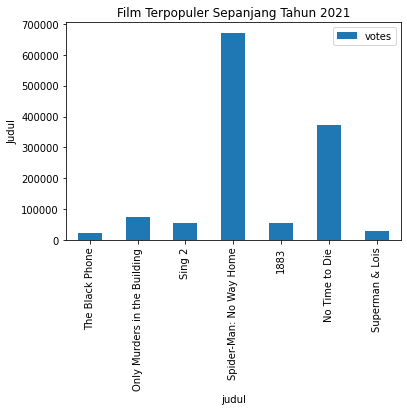

In [76]:
film_fav.plot.bar(x="judul", 
                   y="votes",
                   ylabel='Judul',
                   title="Film Terpopuler Sepanjang Tahun 2021"
                  )

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [82]:
film_fav.mean()

C:\Users\rendy\AppData\Local\Temp\ipykernel_12320\2250193881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  film_fav.mean()


rating            7.857143
metascore        29.142857
votes        182854.857143
dtype: float64

In [83]:
df.mean()

C:\Users\rendy\AppData\Local\Temp\ipykernel_12320\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


rating            7.272
metascore        30.560
votes        157829.840
dtype: float64

In [92]:
pd.crosstab(
    index=df['judul'], 
    columns=df['rating'], 
    values=df['rating'],
    aggfunc='mean'
).idxmax().(1)

rating
9.0    Arcane: League of Legends
dtype: object

In [96]:
pd.crosstab(
    index=df['judul'], 
    columns=df['rating'], 
    values=df['rating'],
    aggfunc='mean'
).idxmin().head(1)

rating
5.2    Resident Evil: Welcome to Raccoon City
dtype: object

In [104]:
df.set_index('judul', inplace=True)

In [105]:
df.loc[ ["Resident Evil: Welcome to Raccoon City"] , ["rating", "metascore", "votes"] ]

,rating,metascore,votes
judul,,,
Resident Evil: Welcome to Raccoon City,5.2,0.0,46770


In [106]:
df.loc[ ["Arcane: League of Legends"] , ["rating", "metascore", "votes"] ]

,rating,metascore,votes
judul,,,
Arcane: League of Legends,9.0,0.0,184167



(Put your analysis and conclusion here.)
- Pada 50 film terpopuler, rata-rata dari rating adalah sebesar 7,3 dari 10. Sedangkan metascore mendapatkan 30,6 dari 100, dan rata-rata orang yang memilih adalah sebanyak 157.829 orang.
- Sedangkan pada 7 film terpopuler, rata-rata ratingnya adalah sebesar 7.9 dari 10. Sedikit lebih tinggi dibandingkan dengan rata-rata dari 50 film terpopuler. Namun menariknya sepertinya tidak terlalu mendekati rating tertinggi sebesar 9.
- Namun pada 7 film terpopuler rata-rata metascore-nya adalah 29,1 sedikit lebih kecil dibandingkan 50 film terpopuler. hasil ini perlu dilihat dengan hati-hati karena ada beberapa film yang tidak memiliki nilai metascore.
- Untuk jumlah pemilih (voters) pada 7 film terpopuler rata-ratanya adalah sebesar 182.854 orang, lebih banyak yang memilih dari 50 film terpopuler. Ini mengindikasikan bahwa semakin populer suatu film maka semakin banyak jumlah orang yang melakukan voting.
- Film yang mendapatkan nilai rating terendah dari 50 film terpopuler adalah Resident Evil: Welcome to Raccoon City, dengan rating 5,2 dan voter sebanyak 46,770.
- Sedangkan film dengan nilai rating tertinggi dari 50 film terpopuler adalah Arcane: League of Legends, dengan rating sebesar 9 dan voter sebanyak 184,167. Meskipun begitu, film ini tidak masuk dalam jajaran 7 film terpopuler.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.